# Diseño de amplificador
## VFA-CFA compensado

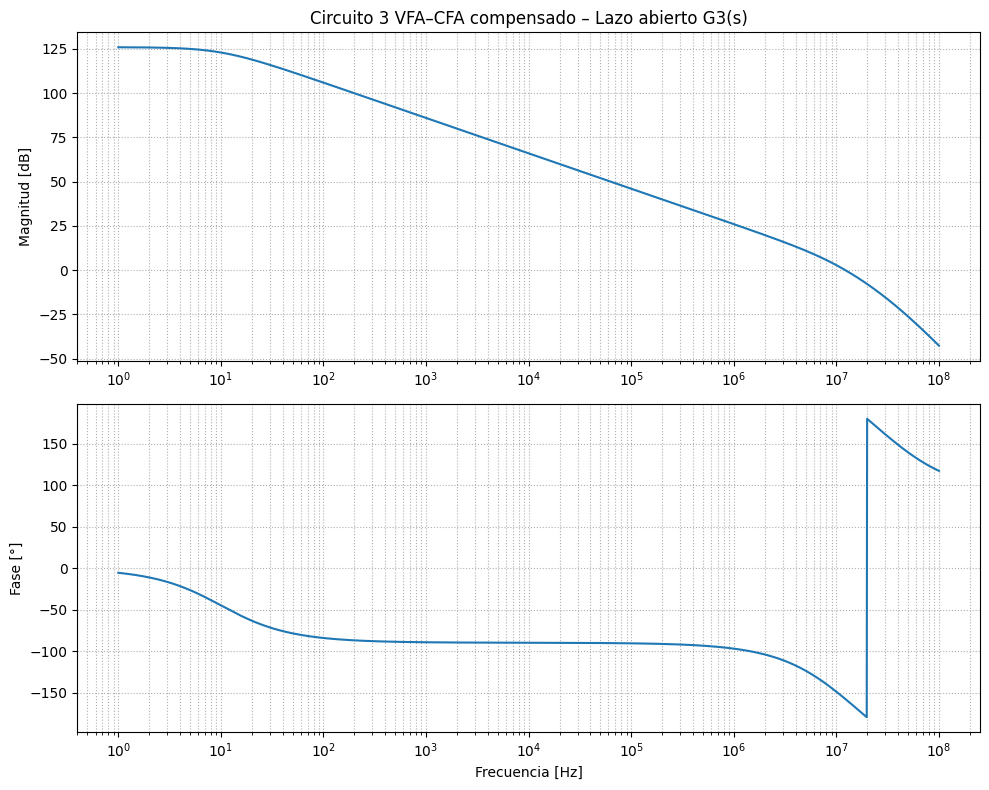

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Parámetros VFA (LM324) - 2 polos
# ==========================
A0_vfa = 1e5
f1_vfa = 10         # Hz
f2_vfa = 5.06e6     # Hz
w1_vfa = 2*np.pi*f1_vfa
w2_vfa = 2*np.pi*f2_vfa

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)     # 1 Hz ... 100 MHz
w = 2*np.pi*f
s = 1j*w

# Lazo abierto de un LM324
A_vfa_ol = A0_vfa / ((1 + s/w1_vfa) * (1 + s/w2_vfa))

# ==========================
# Compensador RC
# ==========================
k_comp = 0.5
fz_comp = f2_vfa          # el cero cancela el segundo polo del VFA
fp_comp = 2 * fz_comp     # el polo una octava arriba

wz_comp = 2*np.pi*fz_comp
wp_comp = 2*np.pi*fp_comp

Ac = k_comp * (1 + s/wz_comp) / (1 + s/wp_comp)

# ==========================
# CFA (LM6181) en lazo cerrado
# ==========================
Avf2_comp = 40.0          # ganancia local del CFA ajustada
f_cfa_cl = 39e6           # polo de lazo cerrado del CFA
w_cfa_cl = 2*np.pi*f_cfa_cl

A_cfa_cl = Avf2_comp / (1 + s/w_cfa_cl)

# ==========================
# Lazo abierto total del compuesto (circuito 3)
# ==========================
G3 = A_vfa_ol * Ac * A_cfa_cl

mag_G3 = 20*np.log10(np.abs(G3))
phase_G3 = np.angle(G3, deg=True)

# ==========================
# Gráfico Bode – lazo abierto
# ==========================
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.semilogx(f, mag_G3)
plt.ylabel('Magnitud [dB]')
plt.title('Circuito 3 VFA–CFA compensado – Lazo abierto G3(s)')
plt.grid(True, which='both', ls=':')

plt.subplot(2,1,2)
plt.semilogx(f, phase_G3)
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()


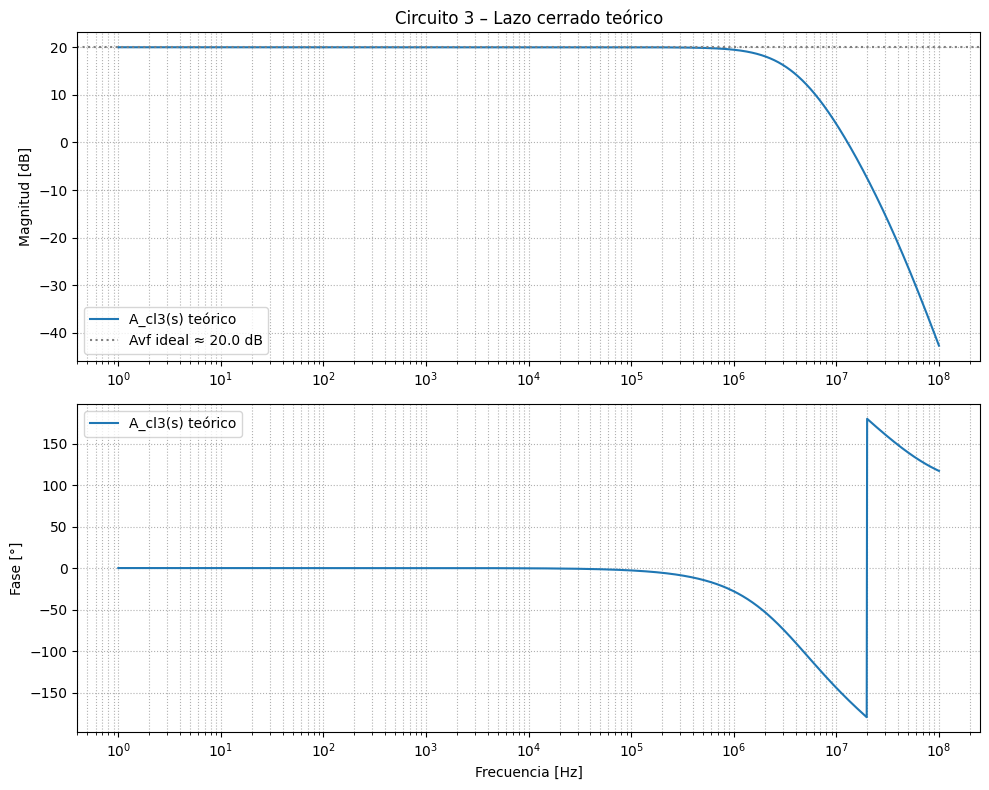

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ======= mismos parámetros que antes =======
A0_vfa = 1e5
f1_vfa = 10
f2_vfa = 5.06e6
w1_vfa = 2*np.pi*f1_vfa
w2_vfa = 2*np.pi*f2_vfa

f = np.logspace(0, 8, 2000)
w = 2*np.pi*f
s = 1j*w

A_vfa_ol = A0_vfa / ((1 + s/w1_vfa) * (1 + s/w2_vfa))

k_comp = 0.5
fz_comp = f2_vfa
fp_comp = 2 * fz_comp
wz_comp = 2*np.pi*fz_comp
wp_comp = 2*np.pi*fp_comp
Ac = k_comp * (1 + s/wz_comp) / (1 + s/wp_comp)

Avf2_comp = 40.0
f_cfa_cl = 39e6
w_cfa_cl = 2*np.pi*f_cfa_cl
A_cfa_cl = Avf2_comp / (1 + s/w_cfa_cl)

# ======== realimentación global ========
Ri = 10e3
Rf = 90e3
beta = Ri / (Ri + Rf)
Avf_ideal = 1 + Rf/Ri      # debería seguir siendo ≈10 (20 dB)

# Lazo abierto y lazo cerrado
G3 = A_vfa_ol * Ac * A_cfa_cl
Acl3 = G3 / (1 + beta * G3)

mag_Acl3 = 20*np.log10(np.abs(Acl3))
phase_Acl3 = np.angle(Acl3, deg=True)

# ======== gráfico ========
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.semilogx(f, mag_Acl3, label='A_cl3(s) teórico')
plt.axhline(20*np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal ≈ %.1f dB' % (20*np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Circuito 3 – Lazo cerrado teórico')
plt.grid(True, which='both', ls=':')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(f, phase_Acl3, label='A_cl3(s) teórico')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()


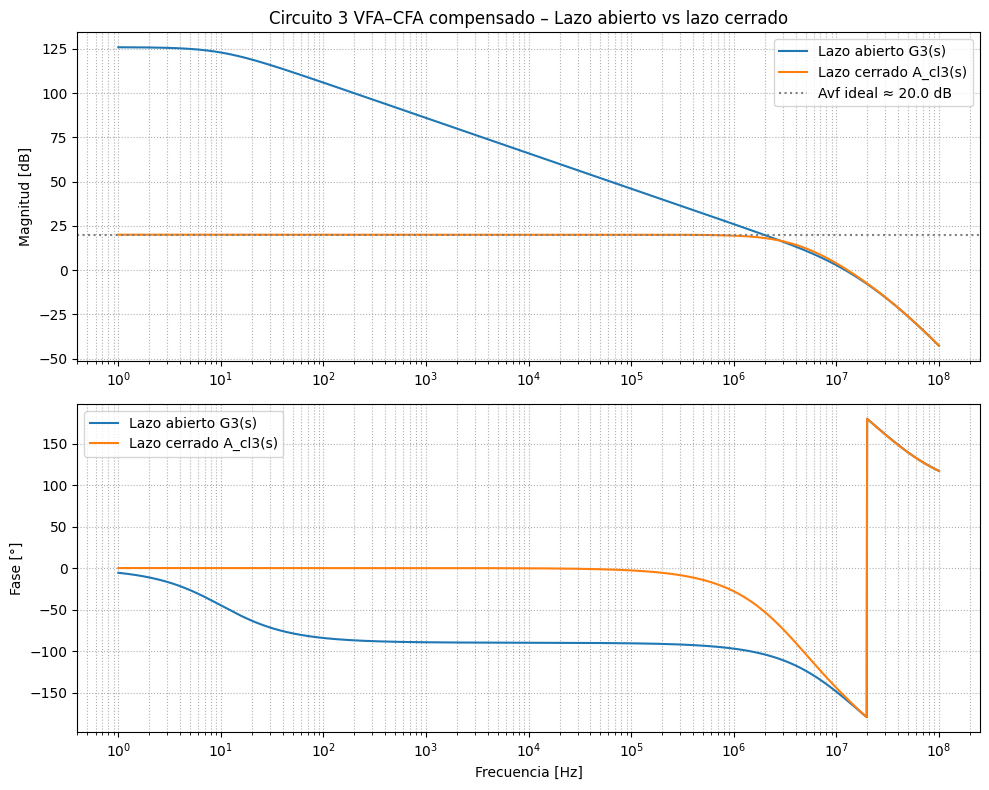

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Parámetros VFA (LM324) - 2 polos
# ==========================
A0_vfa = 1e5
f1_vfa = 10          # Hz
f2_vfa = 5.06e6      # Hz
w1_vfa = 2 * np.pi * f1_vfa
w2_vfa = 2 * np.pi * f2_vfa

# Barrido de frecuencias
f = np.logspace(0, 8, 2000)   # 1 Hz ... 100 MHz
w = 2 * np.pi * f
s = 1j * w

# Lazo abierto de un LM324
A_vfa_ol = A0_vfa / ((1 + s / w1_vfa) * (1 + s / w2_vfa))

# ==========================
# Compensador RC (circuito 3)
# ==========================
k_comp = 0.5
fz_comp = f2_vfa           # cero en el mismo lugar que el 2° polo del VFA
fp_comp = 2 * fz_comp      # polo una octava arriba

wz_comp = 2 * np.pi * fz_comp
wp_comp = 2 * np.pi * fp_comp

Ac = k_comp * (1 + s / wz_comp) / (1 + s / wp_comp)

# ==========================
# CFA (LM6181) en lazo cerrado
# ==========================
Avf2_comp = 40.0           # ganancia local ajustada por la atenuación k_comp
f_cfa_cl = 39e6            # polo de lazo cerrado del CFA
w_cfa_cl = 2 * np.pi * f_cfa_cl

A_cfa_cl = Avf2_comp / (1 + s / w_cfa_cl)

# ==========================
# Realimentación global (no inversor)
# ==========================
Ri = 10e3
Rf = 90e3
beta = Ri / (Ri + Rf)
Avf_ideal = 1 + Rf / Ri    # ganancia ideal ≈ 10 (20 dB)

# ==========================
# Lazo abierto y lazo cerrado del circuito 3
# ==========================
G3 = A_vfa_ol * Ac * A_cfa_cl          # lazo abierto compuesto
Acl3 = G3 / (1 + beta * G3)           # lazo cerrado compuesto

mag_G3 = 20 * np.log10(np.abs(G3))
phase_G3 = np.angle(G3, deg=True)

mag_Acl3 = 20 * np.log10(np.abs(Acl3))
phase_Acl3 = np.angle(Acl3, deg=True)

# ==========================
# Gráfico: lazo abierto vs lazo cerrado (teórico)
# ==========================
plt.figure(figsize=(10,8))

# --- Módulo ---
plt.subplot(2,1,1)
plt.semilogx(f, mag_G3, label='Lazo abierto G3(s)')
plt.semilogx(f, mag_Acl3, label='Lazo cerrado A_cl3(s)')
plt.axhline(20 * np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal ≈ %.1f dB' % (20 * np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Circuito 3 VFA–CFA compensado – Lazo abierto vs lazo cerrado')
plt.grid(True, which='both', ls=':')
plt.legend()

# --- Fase ---
plt.subplot(2,1,2)
plt.semilogx(f, phase_G3, label='Lazo abierto G3(s)')
plt.semilogx(f, phase_Acl3, label='Lazo cerrado A_cl3(s)')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()


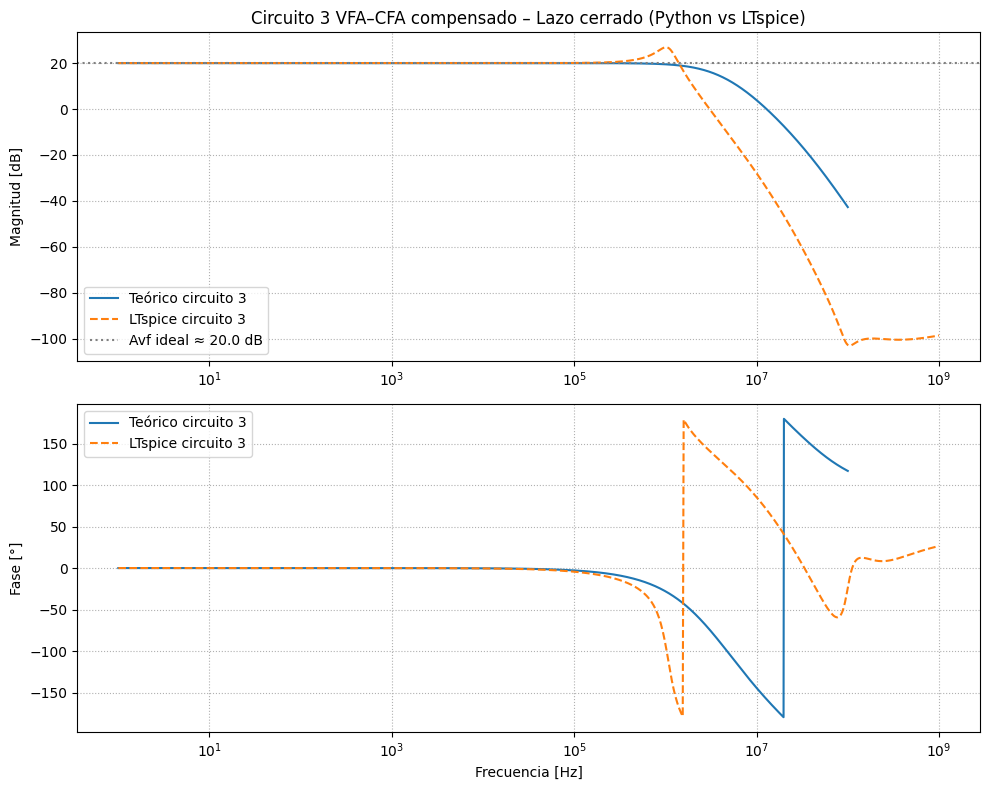

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
#  Modelo teórico (mismo que en 2️⃣)
# ==========================
A0_vfa = 1e5
f1_vfa = 10
f2_vfa = 5.06e6
w1_vfa = 2*np.pi*f1_vfa
w2_vfa = 2*np.pi*f2_vfa

f = np.logspace(0, 8, 2000)
w = 2*np.pi*f
s = 1j*w

A_vfa_ol = A0_vfa / ((1 + s/w1_vfa) * (1 + s/w2_vfa))

k_comp = 0.5
fz_comp = f2_vfa
fp_comp = 2 * fz_comp
wz_comp = 2*np.pi*fz_comp
wp_comp = 2*np.pi*fp_comp
Ac = k_comp * (1 + s/wz_comp) / (1 + s/wp_comp)

Avf2_comp = 40.0
f_cfa_cl = 39e6
w_cfa_cl = 2*np.pi*f_cfa_cl
A_cfa_cl = Avf2_comp / (1 + s/w_cfa_cl)

Ri = 10e3
Rf = 90e3
beta = Ri / (Ri + Rf)
Avf_ideal = 1 + Rf/Ri

G3 = A_vfa_ol * Ac * A_cfa_cl
Acl3 = G3 / (1 + beta * G3)

mag_Acl3 = 20*np.log10(np.abs(Acl3))
phase_Acl3 = np.angle(Acl3, deg=True)

# ==========================
#  Datos LTspice (archivo: Freq   Re,Im)
# ==========================
freq_meas = []
re_meas = []
im_meas = []

with open("amp_vfa_cfa_comp.txt", "r", encoding="latin1", errors="ignore") as f_lt:
    for line in f_lt:
        line = line.strip()
        if not line:
            continue

        parts = line.split()
        if len(parts) < 2:
            continue

        # intentar parsear la frecuencia
        try:
            f_val = float(parts[0])
        except ValueError:
            # línea de encabezado u otra cosa → la ignoramos
            continue

        comp_str = parts[1].strip('()')
        try:
            re_str, im_str = comp_str.split(',')
        except ValueError:
            continue

        re_val = float(re_str)
        im_val = float(im_str)

        freq_meas.append(f_val)
        re_meas.append(re_val)
        im_meas.append(im_val)

freq_meas = np.array(freq_meas)
re_meas = np.array(re_meas)
im_meas = np.array(im_meas)

Vout_meas = re_meas + 1j*im_meas
mag_meas = 20*np.log10(np.abs(Vout_meas))
phase_meas = np.angle(Vout_meas, deg=True)

# ==========================
#  Gráfico comparativo
# ==========================
plt.figure(figsize=(10,8))

# --- Magnitud ---
plt.subplot(2,1,1)
plt.semilogx(f, mag_Acl3, label='Teórico circuito 3')
plt.semilogx(freq_meas, mag_meas, '--', label='LTspice circuito 3')
plt.axhline(20*np.log10(Avf_ideal), color='gray', linestyle=':',
            label='Avf ideal ≈ %.1f dB' % (20*np.log10(Avf_ideal)))
plt.ylabel('Magnitud [dB]')
plt.title('Circuito 3 VFA–CFA compensado – Lazo cerrado (Python vs LTspice)')
plt.grid(True, which='both', ls=':')
plt.legend()

# --- Fase ---
plt.subplot(2,1,2)
plt.semilogx(f, phase_Acl3, label='Teórico circuito 3')
plt.semilogx(freq_meas, phase_meas, '--', label='LTspice circuito 3')
plt.ylabel('Fase [°]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True, which='both', ls=':')
plt.legend()

plt.tight_layout()
plt.show()
